# HOUSE PRICE REGRESSION

# 1.Problem Definition
>The problem is a regression problem and we predict saleprice from different features provided about the house.

# 2. Data
> The data is taken from kaggle.
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data


# 3.Evaluation 
> Here the evaluation metrics is RMSE(Root mean squared error) i.e square root of mean squared error.
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation

# 4.Features
> Go through this link to see the different description of the features available.
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
#IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#IMPORT MODELS
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR


# EXPLORATORY DATA ANALYSIS

In [2]:
df=pd.read_csv("House data/train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
## Checking if there is any null value in the data
df.isna().sum().sum()

6965

In [10]:
## Finding all of the columns that contains null value
b=0
for label,content in df.items():
    if pd.isnull(content).sum():
        b=b+1
        print(label)
print(b)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature
19


In [11]:
## Taking dataframe and looing all data in transposed format
df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
MoSold,2,5,9,2,12
YrSold,2008,2007,2008,2006,2008
SaleType,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal


In [9]:
df["YrSold"].dtypes

dtype('int64')

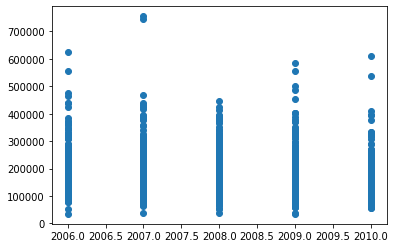

In [10]:
## Looking at plot between columns
fig,ax=plt.subplots()
ax.scatter(df["YrSold"],df["SalePrice"])

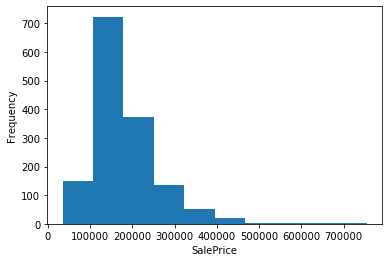

In [31]:
## Looking at histogram of using target column
df.SalePrice.plot.hist();
plt.xlabel("SalePrice")
plt.show()

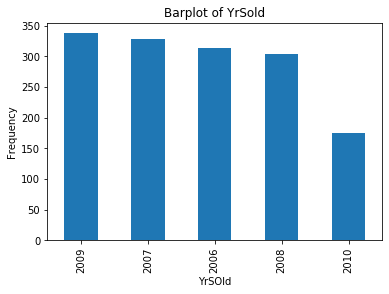

In [28]:
df["YrSold"].value_counts().plot(kind="bar")
plt.xlabel("YrSOld")
plt.ylabel("Frequency")
plt.title("Barplot of YrSold");

In [32]:
## Copying the data into another variable
df_tmp=df.copy()

In [33]:
df_tmp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [34]:
## Sorting the data according to the YearBUilt
df_tmp.sort_values(by=["YearBuilt"],inplace=True,ascending=True)

In [35]:
df_tmp["YearBuilt"]

1349    1872
1137    1875
747     1880
304     1880
1132    1880
        ... 
898     2009
515     2009
157     2009
762     2009
378     2010
Name: YearBuilt, Length: 1460, dtype: int64

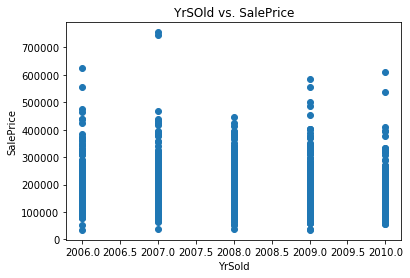

In [39]:
## Scatter plot between YrSold and SalePrice
plt.scatter(df_tmp["YrSold"],df_tmp["SalePrice"]);
plt.xlabel("YrSold")
plt.ylabel("SalePrice")
plt.title("YrSOld vs. SalePrice");

Text(0.5, 1.0, 'YearBuilt vs. SalePric')

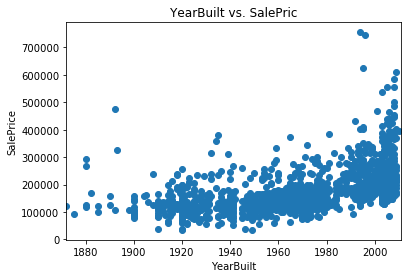

In [41]:
## PLot between YearBuilt and SalePrice
plt.scatter(df_tmp["YearBuilt"],df_tmp["SalePrice"])
plt.xlim([1872,2011])
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.title("YearBuilt vs. SalePric")

In [42]:
df_tmp["YrSold"].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [43]:
## Finding the correlation between different columns and plotting in seaborn heatmap
a=df_tmp.corr()

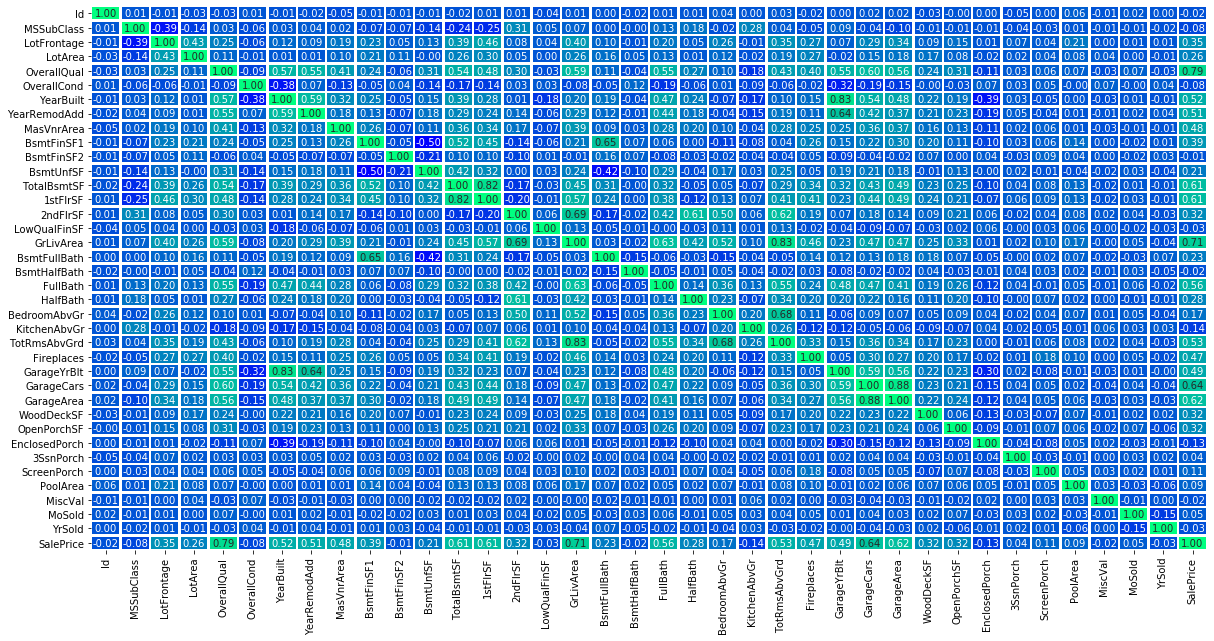

In [46]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(20,10))
ax=sns.heatmap(a,
              annot=True,
              cbar=False,
              linewidths=1.5,
              cmap="winter",
               fmt=".2f"
              )

## DATA PREPROCESSING

### CONVERTING DATA INTO CATEGORICAL AND CONVERTING INTO NUMBERS

In [100]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1349 to 378
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  Overal

In [48]:
## Making a function to convert object data into categorical form
def categorify(data):
    for label,content in data.items():
        if pd.api.types.is_string_dtype(content):
            data[label]=content.astype("category").cat.as_ordered()
    return data

In [49]:
df_tmp=categorify(df_tmp)

In [50]:
## Checking the info about data after going through categorifying the data
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1349 to 378
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   

**NOW SINCE THE DATA IS IN CATEGORICAL AND NUMERICAL FORMAT ONLY,LET'S CONVERT THE CATEGORICAL DATA INTO NUMERICAL FORM USING PANDAS API**

In [51]:
## Let's create a function to create such a data
def numerify(data):
    for label,content in data.items():
        if not pd.api.types.is_numeric_dtype(content):
            data[label]=pd.Categorical(content).codes+1
    return data
    

In [52]:
df_tmp=numerify(df_tmp)

In [53]:
## CHecking again the info of df_tmp
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1349 to 378
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int8   
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int8   
 6   Alley          1460 non-null   int8   
 7   LotShape       1460 non-null   int8   
 8   LandContour    1460 non-null   int8   
 9   Utilities      1460 non-null   int8   
 10  LotConfig      1460 non-null   int8   
 11  LandSlope      1460 non-null   int8   
 12  Neighborhood   1460 non-null   int8   
 13  Condition1     1460 non-null   int8   
 14  Condition2     1460 non-null   int8   
 15  BldgType       1460 non-null   int8   
 16  HouseStyle     1460 non-null   int8   
 17  OverallQual    1460 non-null   int64  
 18  Overal

**So now every column is in numerical form so,let's deal with missing values**

In [55]:
## Check the missing values
df_tmp.isna().sum().sum()

348

It shows that there are 348 null spaces in the data now.

In [59]:
## Check the column that has null values
for label,content in df_tmp.items():
    if pd.isnull(content).sum():
        print(label)

LotFrontage
MasVnrArea
GarageYrBlt


In [64]:
##CHECKING THE VALUES OF THE ABOVE COLUMNS
df_tmp["LotFrontage"].isna().sum(),df_tmp["MasVnrArea"].isna().sum(),df_tmp["GarageYrBlt"].isna().sum()

(259, 8, 81)

In [65]:
## So,let's fill these numerical columns null spaces with median values
def fill_null(data):
    for label,content in data.items():
        if pd.isnull(content).sum():
            data[label].fillna(content.median(),inplace=True)
    return data

In [66]:
df_tmp=fill_null(df_tmp)

In [67]:
## Checking thr null values
df_tmp.isna().sum().sum()

0

**So the data has been preprocessed and null values have been filled which says the data is now ready to use in modelling.**

# IMPORTANT NOTE
**NOTE:A Glimpse of modelling is here but the actual hypertuning of the model is done in another google colab.Check out the colab notebook**

# MODELLING

In [78]:
## Splitting the data
np.random.seed(100)
from sklearn.model_selection import train_test_split
X=df_tmp.drop("SalePrice",axis=1)
y=df_tmp["SalePrice"]
X_train,X_valid,y_train,y_valid=train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                shuffle=True)

In [73]:
## IMporting the models for regression to experiment on those 
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [74]:
models={"LinearRegression":LinearRegression(),
       "Lasso":Lasso(),
       "Ridge":Ridge(),
       "RandomForestRegression":RandomForestRegressor(),
       "Gradient":GradientBoostingRegressor(),
       "AdaBoostRegressor":AdaBoostRegressor(),
       "SVR":SVR(),
       "DecisionTreeRegressor":DecisionTreeRegressor()}

In [87]:
from sklearn.metrics import mean_absolute_error,r2_score,recall_score,precision_score,roc_auc_score

In [94]:
def fit_and_score(models,X_train,y_train,X_valid,y_valid):
    results={}
    for model_name,model in models.items():
        model.fit(X_train,y_train)
        results[model_name+" accuracy"]=model.score(X_valid,y_valid)
        y_preds=model.predict(X_valid)
        results[model_name+" mean_absolute_error"]=mean_absolute_error(y_valid,y_preds)

    return results
        

In [95]:
## Let's evaluate the function
result_1=fit_and_score(models,X_train,y_train,X_valid,y_valid)
result_1

{'LinearRegression accuracy': 0.7961041368744235,
 'LinearRegression mean_absolute_error': 19309.667603419857,
 'Lasso accuracy': 0.7963561438273482,
 'Lasso mean_absolute_error': 19303.689239995412,
 'Ridge accuracy': 0.8270878164693409,
 'Ridge mean_absolute_error': 19069.553170312185,
 'RandomForestRegression accuracy': 0.8880808615266487,
 'RandomForestRegression mean_absolute_error': 16605.148356164384,
 'Gradient accuracy': 0.8804617793522459,
 'Gradient mean_absolute_error': 16318.967500646166,
 'AdaBoostRegressor accuracy': 0.8215889843882277,
 'AdaBoostRegressor mean_absolute_error': 22302.18952412697,
 'SVR accuracy': -0.058692609181610685,
 'SVR mean_absolute_error': 53341.10468022511,
 'DecisionTreeRegressor accuracy': 0.7398789669624153,
 'DecisionTreeRegressor mean_absolute_error': 23983.195205479453}

**The above result show that SVR is not fit for this regression beacause its metrics is too worse to improve.**

## HYPERTUNING EACH MODEL TO CHECK WHICH PERFORMS THE BEST

## 1.Lasso


In [103]:
from sklearn.model_selection import GridSearchCV
param_grid={"alpha":[1,1.2,1.3],
           "selection":['cyclic','random'],
           "max_iter":[4000,5000,6000]}
lasso_model=GridSearchCV(Lasso(),
                          param_grid=param_grid
                      )

In [126]:
## Create a function to check metrics of each model
def check_metrics(model):
    model.fit(X_train,y_train)
    print(model.best_params_)
    print("accuracy",model.score(X_valid,y_valid))
    print("mae",mean_absolute_error(y_valid,model.predict(X_valid)))

In [111]:
check_metrics(lasso_model)

C:\Users\DELL\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 221595745429.44556, tolerance: 613262252.1296164
  model = cd_fast.enet_coordinate_descent(


accuracy 0.7963561462131796
mae 19303.68992673301


**Since the model doesn't improve even after tuning let's discard this as well and hypertune another**

## 2.RandomForestRegressor

In [127]:
np.random.seed(100)
param_grid_forest={"n_estimators":[60,70,80,100,110,120],
                  "max_features":['sqrt',"auto"],
                  "min_samples_split":[10,20,30,40,50]}

forest_model=GridSearchCV(RandomForestRegressor(),
                         param_grid=param_grid_forest,
                          cv=5
                    )

In [128]:
check_metrics(forest_model)

{'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 120}
accuracy 0.872108774413639
mae 17144.48703068341


In [118]:
result_1

{'LinearRegression accuracy': 0.7961041368744235,
 'LinearRegression mean_absolute_error': 19309.667603419857,
 'Lasso accuracy': 0.7963561438273482,
 'Lasso mean_absolute_error': 19303.689239995412,
 'Ridge accuracy': 0.8270878164693409,
 'Ridge mean_absolute_error': 19069.553170312185,
 'RandomForestRegression accuracy': 0.8880808615266487,
 'RandomForestRegression mean_absolute_error': 16605.148356164384,
 'Gradient accuracy': 0.8804617793522459,
 'Gradient mean_absolute_error': 16318.967500646166,
 'AdaBoostRegressor accuracy': 0.8215889843882277,
 'AdaBoostRegressor mean_absolute_error': 22302.18952412697,
 'SVR accuracy': -0.058692609181610685,
 'SVR mean_absolute_error': 53341.10468022511,
 'DecisionTreeRegressor accuracy': 0.7398789669624153,
 'DecisionTreeRegressor mean_absolute_error': 23983.195205479453}

In [129]:
## Export the preprocessed data
df_tmp.to_csv("House data/house_price_preprocessed_data.csv",index=False)